In [2]:
import os

import numpy as np
import pandas as pd

In [27]:
pd.options.mode.copy_on_write = True



In [28]:
line = 2

In [ ]:
pi_data_dir="data/2_147_utastajekoztatas"
d={}
for file_n in os.listdir(pi_data_dir):
    if file_n.endswith(f'{str(line)}.txt') and 'textitem_' not in file_n:
        print(file_n)
        d[file_n]= pd.read_csv(os.path.join(pi_data_dir,file_n),sep=',',encoding='iso-8859-2')  

textitemscope_2.txt
vonat_esemenyek_2.txt


In [29]:
for k,v in d.items():
    print(k)

textitemscope_2.txt
vonat_esemenyek_2.txt
vonat_fej_2.txt
vonat_kesesi_okok_2.txt


In [30]:
d['vonat_esemenyek_2.txt'].head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,FOR_MODDAT,ADATJELLEG,TENY_IDO,LEMONDAS,UTMODDAT,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO
0,2010,2023.01.01,55,4,55,10033,2023.01.01 00:25:00,0,i,NaN,...,NaN,NaN,NaN,NaN,2022.12.31 21:06:02.000000,465,1.0,NaN,NaN,NaN
1,2010,2023.01.01,55,2,55,10033,2023.01.01 00:25:00,1,i,NaN,...,2023.01.01 00:26:08,1.0,2023.01.01 00:25:24,NaN,2023.01.01 00:25:44.491805,465,1.0,NaN,9.455142e+11,9.455142e+11
2,2010,2023.01.01,55,1,55,10082,2023.01.01 00:29:00,2,NaN,NaN,...,2023.01.01 00:32:07,1.0,2023.01.01 00:30:07,NaN,2023.01.01 00:30:25.319977,465,1.0,NaN,9.455142e+11,9.455142e+11
3,2010,2023.01.01,55,2,55,10082,2023.01.01 00:30:00,3,NaN,NaN,...,2023.01.01 00:32:59,1.0,2023.01.01 00:30:58,NaN,2023.01.01 00:33:05.320497,465,1.0,NaN,9.455142e+11,9.455142e+11
4,2010,2023.01.01,55,1,55,10124,2023.01.01 00:35:00,4,NaN,NaN,...,2023.01.01 00:35:22,1.0,2023.01.01 00:34:50,NaN,2023.01.01 00:35:04.204084,465,1.0,NaN,9.455142e+11,9.455142e+11


VONATSZAM: adott vonat a menetrendben

ALLOMAS: állomás kódja

IDO:  érkezés tervideje

TENY_IDO: érk tényideje

ESEMENY:
- 1 érkezés
- 2 indulás
- 4 ?


In [31]:
d['vonat_fej_2.txt'].head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,VONATNEV,VNEM_KOD,VNEM_ROVID_NEV,LEMONDAS,OSSZEVONT,START_VONAT,GYSEV_VONAT,NOSZTALGIA_VONAT,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM,KESES,IND_IDO,ERK_IDO
0,2010,2023.01.01,55,NaN,18,BESZ,NaN,N,I,N,N,10033,1511,46,0.0,2023.01.01 00:25:00,2023.01.01 01:35:00
1,2011,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,1511,10033,34,5.0,2023.01.01 18:05:00,2023.01.01 19:14:00
2,2012,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,10033,1511,35,0.0,2023.01.01 06:21:00,2023.01.01 07:26:00
3,2013,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,1511,10033,34,0.0,2023.01.01 14:05:00,2023.01.01 15:09:34
4,2014,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,10033,1511,33,0.0,2023.01.01 10:21:00,2023.01.01 11:26:01


IND_IDO, ERK_IDO, KESES: tényadatoknak látszanak

## halmozott késés egy adott ponton: 

IDO-TENY_IDO



d['vonat_esemenyek_2.txt'] -> groupby('vonatszam','KOZLEKEDESI_NAP') - orderby ALLOMAS_SORSZAM egy adott vonat erkezési adatai 

In [32]:
events =d['vonat_esemenyek_2.txt'].head(100)

In [33]:
events['IDO']=pd.to_datetime(events['IDO'],format='%Y.%m.%d %H:%M:%S')

In [34]:
events['TENY_IDO']=pd.to_datetime(events['TENY_IDO'],format='%Y.%m.%d %H:%M:%S')


In [35]:
events['Delay']=events['TENY_IDO']-events['IDO']

In [36]:
events['prev_Delay']=events.groupby(['VONATSZAM','KOZLEKEDESI_NAP'])['Delay'].shift()

# Kezedetleges metódus késések számolására

In [104]:
def process_events(events):
    events['IDO']=pd.to_datetime(events['IDO'],format='%Y.%m.%d %H:%M:%S')
    events['TENY_IDO']=pd.to_datetime(events['TENY_IDO'],format='%Y.%m.%d %H:%M:%S')
    events['Delay']=events['TENY_IDO']-events['IDO']
    events['prev_Delay']=events.groupby(['VONATSZAM','KOZLEKEDESI_NAP'])['Delay'].shift()
    events['Diff']=events['Delay']-events['prev_Delay'] 





In [37]:
events.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,TENY_IDO,LEMONDAS,UTMODDAT,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,NaT,NaN,2022.12.31 21:06:02.000000,465,1.0,NaN,NaN,NaN,NaT,NaT
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,2023-01-01 00:25:24,NaN,2023.01.01 00:25:44.491805,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,2023-01-01 00:30:07,NaN,2023.01.01 00:30:25.319977,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,2023-01-01 00:30:58,NaN,2023.01.01 00:33:05.320497,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,2023-01-01 00:34:50,NaN,2023.01.01 00:35:04.204084,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58


In [38]:
events['Diff']=events['Delay']-events['prev_Delay'] 

In [39]:
events[['VONATSZAM','KOZLEKEDESI_NAP','IDO','TENY_IDO','Delay','prev_Delay','Diff']]

,VONATSZAM,KOZLEKEDESI_NAP,IDO,TENY_IDO,Delay,prev_Delay,Diff
0,2010,2023.01.01,2023-01-01 00:25:00,NaT,NaT,NaT,NaT
1,2010,2023.01.01,2023-01-01 00:25:00,2023-01-01 00:25:24,0 days 00:00:24,NaT,NaT
2,2010,2023.01.01,2023-01-01 00:29:00,2023-01-01 00:30:07,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43
3,2010,2023.01.01,2023-01-01 00:30:00,2023-01-01 00:30:58,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51
4,2010,2023.01.01,2023-01-01 00:35:00,2023-01-01 00:34:50,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52
...,...,...,...,...,...,...,...
95,2012,2023.01.01,2023-01-01 06:49:00,2023-01-01 06:49:10,0 days 00:00:10,0 days 00:00:12,-1 days +23:59:58
96,2012,2023.01.01,2023-01-01 06:49:00,2023-01-01 06:49:48,0 days 00:00:48,0 days 00:00:10,0 days 00:00:38
97,2012,2023.01.01,2023-01-01 06:50:00,2023-01-01 06:50:32,0 days 00:00:32,0 days 00:00:48,-1 days +23:59:44
98,2012,2023.01.01,2023-01-01 06:52:00,2023-01-01 06:52:33,0 days 00:00:33,0 days 00:00:32,0 days 00:00:01


In [43]:
events[['IDO','TENY_IDO','Delay','prev_Delay','Diff']].dtypes

IDO            datetime64[ns]
TENY_IDO       datetime64[ns]
Delay         timedelta64[ns]
prev_Delay    timedelta64[ns]
Diff          timedelta64[ns]
dtype: object

# Átlagos  eltérés a tervezett menetidőtől szolgálati hely páronként

In [40]:
events['prev_Station']=events.groupby(['VONATSZAM','KOZLEKEDESI_NAP'])['ALLOMAS'].shift()


In [41]:
avg_delays=events.groupby(['ALLOMAS','prev_Station'])['Diff'].mean()

In [42]:
avg_delays

ALLOMAS  prev_Station
1404     1404.0                 -1 days +23:59:47
         1420.0                   0 days 00:00:11
         40253.0                  0 days 00:00:18
1408     1404.0                   0 days 00:00:29
         1408.0                   0 days 00:00:28
                                   ...           
40824    1495.0                 -1 days +23:59:50
         1503.0                   0 days 00:00:06
46052    1438.0                 -1 days +23:59:57
         1440.0                 -1 days +23:59:35
         46052.0        0 days 00:00:37.666666666
Name: Diff, Length: 67, dtype: timedelta64[ns]

In [43]:
type(avg_delays)

pandas.core.series.Series

In [44]:
avg_delays.index

MultiIndex([( 1404,  1404.0),
            ( 1404,  1420.0),
            ( 1404, 40253.0),
            ( 1408,  1404.0),
            ( 1408,  1408.0),
            ( 1412,  1408.0),
            ( 1412,  1412.0),
            ( 1420,  1404.0),
            ( 1420,  1412.0),
            ( 1420,  1420.0),
            ( 1420,  1438.0),
            ( 1428,  1420.0),
            ( 1428,  1428.0),
            ( 1433,  1428.0),
            ( 1433,  1433.0),
            ( 1438,  1420.0),
            ( 1438,  1433.0),
            ( 1438,  1438.0),
            ( 1438, 46052.0),
            ( 1440,  1442.0),
            ( 1440, 46052.0),
            ( 1442,  1440.0),
            ( 1442,  1446.0),
            ( 1446,  1442.0),
            ( 1446,  1446.0),
            ( 1446,  1453.0),
            ( 1453,  1446.0),
            ( 1453,  1453.0),
            ( 1453,  1457.0),
            ( 1457,  1453.0),
            ( 1457,  1457.0),
            ( 1457,  1461.0),
            ( 1461,  1457.0),
          

In [45]:
events.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,UTMODDAT,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,prev_Station
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,2022.12.31 21:06:02.000000,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,2023.01.01 00:25:44.491805,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,10033.0
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,2023.01.01 00:30:25.319977,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,10033.0
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,2023.01.01 00:33:05.320497,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,10082.0
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,2023.01.01 00:35:04.204084,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,10082.0


AttributeError: 'DataFrameGroupBy' object has no attribute 'unique'

In [47]:
# melyik napról van szó?
events['MENETREND_IDO']=events['IDO'].dt.time

In [18]:
# not the best - unique works on separated attributes
#schedule = events.groupby(['VONATSZAM'])[['MENETREND_IDO','ALLOMAS','ESEMENY_SORSZAM']].agg['unique']


# Menetrendek az eseményekből visszafejtve

(itt még van mit dolgozni, a menetrendek változása nincs rendesen detektálva)

In [48]:
schedule = events[['VONATSZAM','MENETREND_IDO','ALLOMAS','ESEMENY_SORSZAM']].drop_duplicates().groupby('VONATSZAM')


In [50]:
type(schedule)

pandas.core.groupby.generic.DataFrameGroupBy

In [51]:
for name, group in schedule:
    print(f"Group name: {name}")
    print(group)
    print("\n")


Group name: 2010
    VONATSZAM MENETREND_IDO  ALLOMAS  ESEMENY_SORSZAM
0        2010      00:25:00    10033                0
1        2010      00:25:00    10033                1
2        2010      00:29:00    10082                2
3        2010      00:30:00    10082                3
4        2010      00:35:00    10124                4
5        2010      00:36:00    10124                5
6        2010      00:38:00    10207                6
7        2010      00:38:00    10207                7
8        2010      00:41:00    40253                8
9        2010      00:42:00    40253                9
10       2010      00:43:00     1404               10
11       2010      00:44:00     1404               11
12       2010      00:45:00     1408               12
13       2010      00:45:00     1408               13
14       2010      00:47:00     1412               14
15       2010      00:47:00     1412               15
16       2010      00:50:00     1420               16
17       20

In [52]:
type(group)

pandas.core.frame.DataFrame

In [53]:
type(schedule)

pandas.core.groupby.generic.DataFrameGroupBy

In [55]:
schedule.get_group(name)  

,VONATSZAM,MENETREND_IDO,ALLOMAS,ESEMENY_SORSZAM
82,2012,06:21:00,10033,0
83,2012,06:21:00,10033,1
84,2012,06:25:00,10082,2
85,2012,06:30:00,10124,3
86,2012,06:31:00,10207,4
87,2012,06:32:00,10207,5
88,2012,06:35:00,40253,6
89,2012,06:35:00,40253,7
90,2012,06:36:00,1404,8
91,2012,06:41:00,1420,9


# Vonatfej

In [58]:
train_head= d['vonat_fej_2.txt']

In [59]:
train_head.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,VONATNEV,VNEM_KOD,VNEM_ROVID_NEV,LEMONDAS,OSSZEVONT,START_VONAT,GYSEV_VONAT,NOSZTALGIA_VONAT,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM,KESES,IND_IDO,ERK_IDO
0,2010,2023.01.01,55,NaN,18,BESZ,NaN,N,I,N,N,10033,1511,46,0.0,2023.01.01 00:25:00,2023.01.01 01:35:00
1,2011,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,1511,10033,34,5.0,2023.01.01 18:05:00,2023.01.01 19:14:00
2,2012,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,10033,1511,35,0.0,2023.01.01 06:21:00,2023.01.01 07:26:00
3,2013,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,1511,10033,34,0.0,2023.01.01 14:05:00,2023.01.01 15:09:34
4,2014,2023.01.01,55,NaN,89,BEZ,NaN,N,I,N,N,10033,1511,33,0.0,2023.01.01 10:21:00,2023.01.01 11:26:01


In [60]:
# indulási idő visszafejtése (menetrendbe)
train_head['IND_IDO_GEN']=pd.to_datetime(train_head['IND_IDO'],format='%Y.%m.%d %H:%M:%S').dt.time

In [61]:
# érkezési idő visszafejtése (menetrendbe)

train_head['ERK_IDO_GEN']=pd.to_datetime(train_head['ERK_IDO'],format='%Y.%m.%d %H:%M:%S').dt.time


In [66]:
#inulási és érkezési idő tényadat !!!

separate_trains_in_schedule=train_head[['VONATSZAM','VNEM_KOD','IND_ALL_KOD','CEL_ALL_KOD','CEL_ESEMENY_SORSZAM','IND_IDO_GEN']].drop_duplicates()

In [68]:
separate_trains_in_schedule['VONATSZAM'].value_counts()

VONATSZAM
2026    83
2178    79
2088    73
2060    72
2040    64
        ..
3255     2
3265     2
3223     2
2117     1
2070     1
Name: count, Length: 156, dtype: int64

itt azt vártuk volna, hogy mindenhez egyet kapunk ami nagyjából azt jelentette volna, hogy ugyanakkor, ugyanonnan, ugyanoda megy egy adott VONATSZAMU vonat. Nem ez lett a helyzet :)

In [75]:
separate_trains_in_schedule.head()

,VONATSZAM,VNEM_KOD,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM
0,2010,18,10033,1511,46
1,2011,89,1511,10033,34
2,2012,89,10033,1511,35
3,2013,89,1511,10033,34
4,2014,89,10033,1511,33


In [70]:
separate_trains_in_schedule.dtypes

VONATSZAM               int64
VNEM_KOD                int64
IND_ALL_KOD             int64
CEL_ALL_KOD             int64
CEL_ESEMENY_SORSZAM     int64
IND_IDO_GEN            object
dtype: object

In [71]:
separate_trains_in_schedule.loc[separate_trains_in_schedule['VONATSZAM']==2010]

,VONATSZAM,VNEM_KOD,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM,IND_IDO_GEN
0,2010,18,10033,1511,46,00:25:00
148,2010,18,10033,1511,46,00:24:49
297,2010,18,10033,1511,46,00:24:25
595,2010,18,10033,1511,46,00:24:08
893,2010,18,10033,1511,46,00:24:14
1041,2010,18,10033,1511,46,00:24:21
1338,2010,18,10033,1511,46,00:24:10
1785,2010,18,10033,1511,46,00:24:06
1934,2010,18,10033,1511,46,00:24:02
2379,2010,18,10033,1511,46,00:24:40


In [72]:


separate_trains_in_schedule=train_head[['VONATSZAM','VNEM_KOD','IND_ALL_KOD','CEL_ALL_KOD','CEL_ESEMENY_SORSZAM']].drop_duplicates()


Hány féle konfigurációban jelennek meg az adott vonatok, az indulási, érkezési állomás, illetve a köztes események (érk, indulás, stb ) szempontjából:

In [73]:
separate_trains_in_schedule['VONATSZAM'].value_counts()

VONATSZAM
2052    7
2036    7
2026    7
2082    7
2024    7
       ..
3255    2
3256    2
2117    1
2127    1
2070    1
Name: count, Length: 156, dtype: int64

nézzük a 2010-es vonatot:

In [74]:
separate_trains_in_schedule.loc[separate_trains_in_schedule['VONATSZAM']==2010]


,VONATSZAM,VNEM_KOD,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM
0,2010,18,10033,1511,46
8625,2010,18,10082,1511,44
9665,2010,18,10124,1511,42
15454,2010,18,1453,1511,16
20642,2010,18,10033,1438,23


In [77]:
# úgy néz ki változott a cél és start állomás
train_head['OP_DATE']=pd.to_datetime(train_head['IND_IDO'],format='%Y.%m.%d %H:%M:%S').dt.date


In [78]:
separate_trains_in_schedule=train_head[['VONATSZAM','VNEM_KOD','IND_ALL_KOD','CEL_ALL_KOD','CEL_ESEMENY_SORSZAM','OP_DATE']].drop_duplicates()


In [82]:
single_train_test= separate_trains_in_schedule.loc[separate_trains_in_schedule['VONATSZAM']==2010]


In [84]:
single_train_test

,VONATSZAM,VNEM_KOD,IND_ALL_KOD,CEL_ALL_KOD,CEL_ESEMENY_SORSZAM,OP_DATE
0,2010,18,10033,1511,46,2023-01-01
148,2010,18,10033,1511,46,2023-01-02
297,2010,18,10033,1511,46,2023-01-03
446,2010,18,10033,1511,46,2023-01-04
595,2010,18,10033,1511,46,2023-01-05
...,...,...,...,...,...,...
53435,2010,18,10033,1511,46,2023-12-27
53584,2010,18,10033,1511,46,2023-12-28
53733,2010,18,10033,1511,46,2023-12-29
53882,2010,18,10033,1511,46,2023-12-30


# Hány féle módon közlekedett, hány napon a 2010-es vonat?

In [89]:
route_start_ends= single_train_test.groupby(['VONATSZAM','IND_ALL_KOD','CEL_ALL_KOD','CEL_ESEMENY_SORSZAM'])['OP_DATE'].agg(first="min",last="max",count="count")

In [95]:
# úgy látszik volt pár variálás...
print(type(route_start_ends))
route_start_ends

<class 'pandas.core.frame.DataFrame'>


first        last  \
VONATSZAM IND_ALL_KOD CEL_ALL_KOD CEL_ESEMENY_SORSZAM                           
2010      1453        1511        16                   2023-04-15  2023-04-16   
          10033       1438        23                   2023-05-20  2023-05-21   
                      1511        46                   2023-01-01  2023-12-31   
          10082       1511        44                   2023-02-28  2023-03-03   
          10124       1511        42                   2023-03-07  2023-10-17   

                                                       count  
VONATSZAM IND_ALL_KOD CEL_ALL_KOD CEL_ESEMENY_SORSZAM         
2010      1453        1511        16                       2  
          10033       1438        23                       2  
                      1511        46                     339  
          10082       1511        44                       4  
          10124       1511        42                      18

In [94]:
route_start_ends["count"].agg("sum")

365

In [96]:
events.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,prev_Station,MENETREND_IDO
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,NaN,00:25:00
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,10033.0,00:25:00
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,10033.0,00:29:00
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,10082.0,00:30:00
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,10082.0,00:35:00


In [98]:
schedule.get_group(2010)

,VONATSZAM,MENETREND_IDO,ALLOMAS,ESEMENY_SORSZAM
0,2010,00:25:00,10033,0
1,2010,00:25:00,10033,1
2,2010,00:29:00,10082,2
3,2010,00:30:00,10082,3
4,2010,00:35:00,10124,4
5,2010,00:36:00,10124,5
6,2010,00:38:00,10207,6
7,2010,00:38:00,10207,7
8,2010,00:41:00,40253,8
9,2010,00:42:00,40253,9


In [102]:
events_2010=d['vonat_esemenyek_2.txt']
events_2010=events_2010.loc[events_2010['VONATSZAM']==2010]

In [103]:
#hányszor érintette a 2010-es vonat a különböző állomásokat?
events_2010['ALLOMAS'].value_counts()

ALLOMAS
1511     726
1461     726
1453     726
40261    726
1487     726
1495     726
1503     726
1438     726
1433     726
1428     726
1420     726
1412     726
1408     726
1404     726
40253    726
10207    726
10124    726
1457     726
46052    722
1446     722
10082    690
10033    682
40824    363
1442     361
1440     361
Name: count, dtype: int64

In [105]:
process_events(events_2010)

In [106]:
events_2010.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,LEMONDAS,UTMODDAT,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,NaN,2022.12.31 21:06:02.000000,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,NaN,2023.01.01 00:25:44.491805,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,NaN,2023.01.01 00:30:25.319977,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,NaN,2023.01.01 00:33:05.320497,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,NaN,2023.01.01 00:35:04.204084,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52


In [109]:
event_count=events_2010.groupby('KOZLEKEDESI_NAP')['ESEMENY_SORSZAM'].agg('max')

In [114]:
event_count=event_count.reset_index()

In [116]:
event_count.groupby('ESEMENY_SORSZAM')['KOZLEKEDESI_NAP'].agg(first="min",last="max",count="count")

,first,last,count
ESEMENY_SORSZAM,,,
16,2023.04.15,2023.04.16,2
23,2023.05.20,2023.05.21,2
42,2023.03.07,2023.10.17,18
44,2023.02.28,2023.03.03,4
46,2023.01.01,2023.12.31,339


In [117]:
route_start_ends

first        last  \
VONATSZAM IND_ALL_KOD CEL_ALL_KOD CEL_ESEMENY_SORSZAM                           
2010      1453        1511        16                   2023-04-15  2023-04-16   
          10033       1438        23                   2023-05-20  2023-05-21   
                      1511        46                   2023-01-01  2023-12-31   
          10082       1511        44                   2023-02-28  2023-03-03   
          10124       1511        42                   2023-03-07  2023-10-17   

                                                       count  
VONATSZAM IND_ALL_KOD CEL_ALL_KOD CEL_ESEMENY_SORSZAM         
2010      1453        1511        16                       2  
          10033       1438        23                       2  
                      1511        46                     339  
          10082       1511        44                       4  
          10124       1511        42                      18

In [121]:
import datetime
events_2010['KOZLEKEDESI_NAP_DT']=events_2010['IDO'].dt.date

In [122]:
events_2010.dtypes

VONATSZAM                       int64
KOZLEKEDESI_NAP                object
VSZAM_RENDSZER                  int64
ESEMENY                         int64
ORSZAG_KOD                      int64
ALLOMAS                         int64
IDO                    datetime64[ns]
ESEMENY_SORSZAM                 int64
IND_CEL_JELZO                  object
HATARESEM_JELZO               float64
ALLOMAS_SORSZAM                 int64
MEGALLO_SORSZAM               float64
VONAL                          object
EMIG_ESEMENY                  float64
EMIG_IDO                       object
EMIG_MODDAT                    object
KOFE_IDO                       object
KOFE_MODDAT                    object
FOR_IDO                        object
FOR_MODDAT                     object
ADATJELLEG                    float64
TENY_IDO               datetime64[ns]
LEMONDAS                      float64
UTMODDAT                       object
VONTATO_TIPUS                   int64
MEGALL_JELZO                  float64
FOR00_ESEMEN

In [126]:
datetime.datetime(year=2023,month=1,day=1).date()

datetime.date(2023, 1, 1)

# Rekonstruáljuk a 2023.01.01-es vonalát a 2010-es vonatnak:

In [127]:
prototype_day_2010 = events_2010.loc[events_2010['KOZLEKEDESI_NAP_DT']==datetime.datetime(year=2023,month=1,day=1).date()]


In [128]:
prototype_day_2010

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,UTMODDAT,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,KOZLEKEDESI_NAP_DT
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,2022.12.31 21:06:02.000000,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,2023-01-01
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,2023.01.01 00:25:44.491805,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,2023-01-01
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,2023.01.01 00:30:25.319977,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,2023-01-01
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,2023.01.01 00:33:05.320497,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,2023-01-01
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,2023.01.01 00:35:04.204084,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,2023-01-01
5,2010,2023.01.01,55,2,55,10124,2023-01-01 00:36:00,5,NaN,NaN,...,2023.01.01 00:37:05.586124,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:04,-1 days +23:59:50,0 days 00:00:14,2023-01-01
6,2010,2023.01.01,55,1,55,10207,2023-01-01 00:38:00,6,NaN,NaN,...,2023.01.01 00:38:05.648876,465,1.0,NaN,9.455142e+11,NaN,-1 days +23:59:32,0 days 00:00:04,-1 days +23:59:28,2023-01-01
7,2010,2023.01.01,55,2,55,10207,2023-01-01 00:38:00,7,NaN,NaN,...,2023.01.01 00:38:45.094936,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:16,-1 days +23:59:32,0 days 00:00:44,2023-01-01
8,2010,2023.01.01,55,1,55,40253,2023-01-01 00:41:00,8,NaN,NaN,...,2023.01.01 00:41:24.247887,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:07,0 days 00:00:16,-1 days +23:59:51,2023-01-01
9,2010,2023.01.01,55,2,55,40253,2023-01-01 00:42:00,9,NaN,NaN,...,2023.01.01 00:42:45.325419,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:06,0 days 00:00:07,-1 days +23:59:59,2023-01-01


In [132]:
# mik a szolgálati helyek nevei
places=pd.read_csv('data/2_147_utastajekoztatas/t_szolg_helyek.txt',sep=',',encoding='iso-8859-2')

In [133]:
places.head()

,OR_KOD,SZH_KOD,SZH_NEV,TELJES_NEV,POLGARI_NEV,SZH_TIP_KOD,TEHERVONAT,UTASFORGALOM,UZEMVALT,HATARALLOMAS,UZEM_VVALL_VPE_ID,NYILT_HOZZAFERES,ERV_KEZD,ERV_VEGE,TORZSADAT_NAPLO_ID
0,55,5518739,Sarkad,Sarkad,Sarkad,1,1.0,1.0,0,0,2.0,1.0,2021.07.01,2100.12.31,1
1,55,5543117,Kecskemét-Toldi ipvk.,Kecskemét-Toldi ipvk. pvh.,Kecskemét-Toldi ipvk.,8,1.0,0.0,0,0,2.0,1.0,2021.12.16,2022.12.10 23:59:59,1
2,55,5543117,Kecskemét-Toldi ipvk.,Kecskemét-Toldi ipvk. pvh.,Kecskemét-Toldi ipvk.,8,1.0,0.0,0,0,2.0,1.0,2022.12.11,2099.12.31,1
3,55,5546888,Virágvölgy,Virágvölgy,Virágvölgy,1,1.0,1.0,0,0,2.0,0.0,2008.12.14,2100.12.31,1
4,55,5546268,Fűzfőgyártelep,Fűzfőgyártelep,Fűzfőgyártelep,1,1.0,0.0,0,0,NaN,1.0,2019.12.15,2100.12.31,1


In [152]:
# többször is szerepel ugyanaz a szolgálati hely, most ezt hagyjuk inkább, és tartsuk meg az utolsó előfordulást 
places=places.groupby('TELJES_NEV').agg("last")


In [153]:
places.head()

,OR_KOD,SZH_KOD,SZH_NEV,POLGARI_NEV,SZH_TIP_KOD,TEHERVONAT,UTASFORGALOM,UZEMVALT,HATARALLOMAS,UZEM_VVALL_VPE_ID,NYILT_HOZZAFERES,ERV_KEZD,ERV_VEGE,TORZSADAT_NAPLO_ID
TELJES_NEV,,,,,,,,,,,,,,
Aba-Sárkeresztúr,55,5504135,Aba-Sárkeresztúr,Aba-Sárkeresztúr,1,1.0,1.0,0,0,2.0,1.0,2023.02.07,2100.12.31,1769
Abaliget,55,5507229,Abaliget,Abaliget,1,1.0,1.0,0,0,2.0,1.0,2019.12.15,2100.12.31,1769
Abapuszta mh.,55,5515610,Abapuszta,Abapuszta,2,0.0,1.0,0,0,2.0,1.0,2019.07.22,2099.12.31,1769
Abaújkér,55,5513326,Abaújkér,Abaújkér,2,0.0,1.0,0,0,2.0,1.0,2021.09.10,2023.02.16,994
Abaújkér mh.,55,5513326,Abaújkér,Abaújkér,2,0.0,1.0,0,0,2.0,1.0,2023.12.10,2099.12.31,1769


In [168]:
prototype_day_2010

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,KOZLEKEDESI_NAP_DT,SZH_KOD
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,2023-01-01,5510033
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,2023-01-01,5510033
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,2023-01-01,5510082
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,2023-01-01,5510082
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,2023-01-01,5510124
5,2010,2023.01.01,55,2,55,10124,2023-01-01 00:36:00,5,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:04,-1 days +23:59:50,0 days 00:00:14,2023-01-01,5510124
6,2010,2023.01.01,55,1,55,10207,2023-01-01 00:38:00,6,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,-1 days +23:59:32,0 days 00:00:04,-1 days +23:59:28,2023-01-01,5510207
7,2010,2023.01.01,55,2,55,10207,2023-01-01 00:38:00,7,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:16,-1 days +23:59:32,0 days 00:00:44,2023-01-01,5510207
8,2010,2023.01.01,55,1,55,40253,2023-01-01 00:41:00,8,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:07,0 days 00:00:16,-1 days +23:59:51,2023-01-01,5540253
9,2010,2023.01.01,55,2,55,40253,2023-01-01 00:42:00,9,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:06,0 days 00:00:07,-1 days +23:59:59,2023-01-01,5540253


In [134]:
# gtfs a koordinátákért
gtfs_stops=pd.read_csv("data/gtfsMavMenetrend/stops.txt")

In [135]:
gtfs_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,70,NaN,Búcsúszentlászló,NaN,46.793056,16.932778,NaN,NaN,0,NaN,NaN,2
1,140,NaN,Angyalföld,NaN,47.549722,19.090000,NaN,NaN,0,NaN,NaN,2
2,184,NaN,Felsőjánosfa,NaN,46.841389,16.544167,NaN,NaN,0,NaN,NaN,2
3,185,NaN,Pankasz,NaN,46.835833,16.496111,NaN,NaN,0,NaN,NaN,2
4,186,NaN,Nagyrákos,NaN,46.827222,16.455556,NaN,NaN,0,NaN,NaN,2


In [154]:
#név alapján rendeljünk koordinátákat a SZH-khez
places_with_gtfs=places.merge(gtfs_stops,how='left', left_on='POLGARI_NEV', right_on='stop_name')


In [171]:
places_with_gtfs

,OR_KOD,SZH_KOD,SZH_NEV,POLGARI_NEV,SZH_TIP_KOD,TEHERVONAT,UTASFORGALOM,UZEMVALT,HATARALLOMAS,UZEM_VVALL_VPE_ID,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,55,5504135,Aba-Sárkeresztúr,Aba-Sárkeresztúr,1,1.0,1.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,5507229,Abaliget,Abaliget,1,1.0,1.0,0,0,2.0,...,Abaliget,NaN,46.152778,18.073611,NaN,NaN,0.0,NaN,NaN,2.0
2,55,5515610,Abapuszta,Abapuszta,2,0.0,1.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55,5513326,Abaújkér,Abaújkér,2,0.0,1.0,0,0,2.0,...,Abaújkér,NaN,48.309444,21.198333,NaN,NaN,0.0,NaN,NaN,2.0
4,55,5513326,Abaújkér,Abaújkér,2,0.0,1.0,0,0,2.0,...,Abaújkér,NaN,48.309444,21.198333,NaN,NaN,0.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681,55,5501442,Őrhegy B elágazás,Őrhegy B elágazás,3,0.0,0.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2682,55,5505074,Őriszentpéter,Őriszentpéter,1,1.0,1.0,0,1,2.0,...,Őriszentpéter,NaN,46.828889,16.415278,NaN,NaN,0.0,NaN,NaN,2.0
2683,55,5507740,Őriszentpéter oh.,Őriszentpéter oh.,6,0.0,0.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2684,55,5505561,Őrtilos,Őrtilos,1,1.0,1.0,0,0,2.0,...,Őrtilos,NaN,46.297778,16.887778,NaN,NaN,0.0,NaN,NaN,2.0


In [155]:
places_with_gtfs.loc[places_with_gtfs['SZH_KOD']==5510033]

,OR_KOD,SZH_KOD,SZH_NEV,POLGARI_NEV,SZH_TIP_KOD,TEHERVONAT,UTASFORGALOM,UZEMVALT,HATARALLOMAS,UZEM_VVALL_VPE_ID,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
311,55,5510033,Budapest-Nyugati,Budapest-Nyugati,1,1.0,1.0,0,0,2.0,...,Budapest-Nyugati,NaN,47.510833,19.0575,NaN,NaN,0.0,NaN,NaN,1.0


,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010,2023.01.01,55,2,55,10124,2023-01-01 00:36:00,5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2010,2023.01.01,55,1,55,10207,2023-01-01 00:38:00,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010,2023.01.01,55,2,55,10207,2023-01-01 00:38:00,7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2010,2023.01.01,55,1,55,40253,2023-01-01 00:41:00,8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010,2023.01.01,55,2,55,40253,2023-01-01 00:42:00,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
prototype_day_2010['SZH_KOD']=pd.to_numeric(prototype_day_2010.apply(lambda x:'%s%s' % (x['ORSZAG_KOD'],x['ALLOMAS']),axis=1))


In [145]:
prototype_day_2010.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,KOZLEKEDESI_NAP_DT,SZH_KOD
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,2023-01-01,5510033
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,2023-01-01,5510033
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,2023-01-01,5510082
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,2023-01-01,5510082
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,2023-01-01,5510124


In [147]:
prototype_day_2010

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,VONTATO_TIPUS,MEGALL_JELZO,FOR00_ESEMENY,UIC,MOZDONYAZONOSITO,Delay,prev_Delay,Diff,KOZLEKEDESI_NAP_DT,SZH_KOD
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,465,1.0,NaN,NaN,NaN,NaT,NaT,NaT,2023-01-01,5510033
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:24,NaT,NaT,2023-01-01,5510033
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:01:07,0 days 00:00:24,0 days 00:00:43,2023-01-01,5510082
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:58,0 days 00:01:07,-1 days +23:59:51,2023-01-01,5510082
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,-1 days +23:59:50,0 days 00:00:58,-1 days +23:58:52,2023-01-01,5510124
5,2010,2023.01.01,55,2,55,10124,2023-01-01 00:36:00,5,NaN,NaN,...,465,1.0,NaN,9.455142e+11,9.455142e+11,0 days 00:00:04,-1 days +23:59:50,0 days 00:00:14,2023-01-01,5510124
6,2010,2023.01.01,55,1,55,10207,2023-01-01 00:38:00,6,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,-1 days +23:59:32,0 days 00:00:04,-1 days +23:59:28,2023-01-01,5510207
7,2010,2023.01.01,55,2,55,10207,2023-01-01 00:38:00,7,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:16,-1 days +23:59:32,0 days 00:00:44,2023-01-01,5510207
8,2010,2023.01.01,55,1,55,40253,2023-01-01 00:41:00,8,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:07,0 days 00:00:16,-1 days +23:59:51,2023-01-01,5540253
9,2010,2023.01.01,55,2,55,40253,2023-01-01 00:42:00,9,NaN,NaN,...,465,1.0,NaN,9.455142e+11,NaN,0 days 00:00:06,0 days 00:00:07,-1 days +23:59:59,2023-01-01,5540253


In [156]:
# adjuk a helyinfót hozzá az események listájához
prototype_day_2010_with_gps=prototype_day_2010.merge(places_with_gtfs, how='left',left_on='SZH_KOD', right_on='SZH_KOD')


In [172]:
prototype_day_2010_with_gps

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,Budapest-Nyugati,NaN,47.510833,19.057500,NaN,NaN,0.0,NaN,NaN,1.0
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,Budapest-Nyugati,NaN,47.510833,19.057500,NaN,NaN,0.0,NaN,NaN,1.0
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,Rákosrendező,NaN,47.525556,19.089444,NaN,NaN,0.0,NaN,NaN,2.0
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,Rákosrendező,NaN,47.525556,19.089444,NaN,NaN,0.0,NaN,NaN,2.0
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,Angyalföld,NaN,47.549722,19.090000,NaN,NaN,0.0,NaN,NaN,2.0
5,2010,2023.01.01,55,2,55,10124,2023-01-01 00:36:00,5,NaN,NaN,...,Angyalföld,NaN,47.549722,19.090000,NaN,NaN,0.0,NaN,NaN,2.0
6,2010,2023.01.01,55,1,55,10207,2023-01-01 00:38:00,6,NaN,NaN,...,Újpest,NaN,47.558889,19.079722,NaN,NaN,0.0,NaN,NaN,2.0
7,2010,2023.01.01,55,2,55,10207,2023-01-01 00:38:00,7,NaN,NaN,...,Újpest,NaN,47.558889,19.079722,NaN,NaN,0.0,NaN,NaN,2.0
8,2010,2023.01.01,55,1,55,40253,2023-01-01 00:41:00,8,NaN,NaN,...,Aquincum,NaN,47.566111,19.048056,NaN,NaN,0.0,NaN,NaN,2.0
9,2010,2023.01.01,55,2,55,40253,2023-01-01 00:42:00,9,NaN,NaN,...,Aquincum,NaN,47.566111,19.048056,NaN,NaN,0.0,NaN,NaN,2.0


In [181]:
places.loc[places['SZH_KOD']==1412]

,OR_KOD,SZH_KOD,SZH_NEV,POLGARI_NEV,SZH_TIP_KOD,TEHERVONAT,UTASFORGALOM,UZEMVALT,HATARALLOMAS,UZEM_VVALL_VPE_ID,NYILT_HOZZAFERES,ERV_KEZD,ERV_VEGE,TORZSADAT_NAPLO_ID
TELJES_NEV,,,,,,,,,,,,,,


In [163]:
prototype_day_2010_with_gps.head()

,VONATSZAM,KOZLEKEDESI_NAP,VSZAM_RENDSZER,ESEMENY,ORSZAG_KOD,ALLOMAS,IDO,ESEMENY_SORSZAM,IND_CEL_JELZO,HATARESEM_JELZO,...,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,2010,2023.01.01,55,4,55,10033,2023-01-01 00:25:00,0,i,NaN,...,Budapest-Nyugati,NaN,47.510833,19.057500,NaN,NaN,0.0,NaN,NaN,1.0
1,2010,2023.01.01,55,2,55,10033,2023-01-01 00:25:00,1,i,NaN,...,Budapest-Nyugati,NaN,47.510833,19.057500,NaN,NaN,0.0,NaN,NaN,1.0
2,2010,2023.01.01,55,1,55,10082,2023-01-01 00:29:00,2,NaN,NaN,...,Rákosrendező,NaN,47.525556,19.089444,NaN,NaN,0.0,NaN,NaN,2.0
3,2010,2023.01.01,55,2,55,10082,2023-01-01 00:30:00,3,NaN,NaN,...,Rákosrendező,NaN,47.525556,19.089444,NaN,NaN,0.0,NaN,NaN,2.0
4,2010,2023.01.01,55,1,55,10124,2023-01-01 00:35:00,4,NaN,NaN,...,Angyalföld,NaN,47.549722,19.090000,NaN,NaN,0.0,NaN,NaN,2.0


In [182]:
route_2010=prototype_day_2010_with_gps[['ALLOMAS_SORSZAM','IDO','ESEMENY_SORSZAM','SZH_NEV','stop_lat','stop_lon']].drop_duplicates()

In [183]:
route_2010

,ALLOMAS_SORSZAM,IDO,ESEMENY_SORSZAM,SZH_NEV,stop_lat,stop_lon
0,1,2023-01-01 00:25:00,0,Budapest-Nyugati,47.510833,19.057500
1,1,2023-01-01 00:25:00,1,Budapest-Nyugati,47.510833,19.057500
2,2,2023-01-01 00:29:00,2,Rákosrendező,47.525556,19.089444
3,2,2023-01-01 00:30:00,3,Rákosrendező,47.525556,19.089444
4,3,2023-01-01 00:35:00,4,Angyalföld,47.549722,19.090000
5,3,2023-01-01 00:36:00,5,Angyalföld,47.549722,19.090000
6,4,2023-01-01 00:38:00,6,Újpest,47.558889,19.079722
7,4,2023-01-01 00:38:00,7,Újpest,47.558889,19.079722
8,5,2023-01-01 00:41:00,8,Aquincum,47.566111,19.048056
9,5,2023-01-01 00:42:00,9,Aquincum,47.566111,19.048056


# !! itt egy csomó szolgálati hely kódhoz nincs lokáció, TODO utána kellene nézni

# Nézzük mit tudunk kirajzolni google maps-szel

In [186]:
route_2010['C']=route_2010.apply(lambda x: [x['stop_lat'],x['stop_lon']],axis=1)


In [198]:
import numpy as np
route_2010 =route_2010.dropna(subset=['stop_lat'])

In [199]:
route_2010

,ALLOMAS_SORSZAM,IDO,ESEMENY_SORSZAM,SZH_NEV,stop_lat,stop_lon,C
0,1,2023-01-01 00:25:00,0,Budapest-Nyugati,47.510833,19.057500,"[47.51083333333333, 19.0575]"
1,1,2023-01-01 00:25:00,1,Budapest-Nyugati,47.510833,19.057500,"[47.51083333333333, 19.0575]"
2,2,2023-01-01 00:29:00,2,Rákosrendező,47.525556,19.089444,"[47.52555555555556, 19.089444444444442]"
3,2,2023-01-01 00:30:00,3,Rákosrendező,47.525556,19.089444,"[47.52555555555556, 19.089444444444442]"
4,3,2023-01-01 00:35:00,4,Angyalföld,47.549722,19.090000,"[47.54972222222222, 19.09]"
5,3,2023-01-01 00:36:00,5,Angyalföld,47.549722,19.090000,"[47.54972222222222, 19.09]"
6,4,2023-01-01 00:38:00,6,Újpest,47.558889,19.079722,"[47.55888888888889, 19.079722222222223]"
7,4,2023-01-01 00:38:00,7,Újpest,47.558889,19.079722,"[47.55888888888889, 19.079722222222223]"
8,5,2023-01-01 00:41:00,8,Aquincum,47.566111,19.048056,"[47.56611111111111, 19.048055555555557]"
9,5,2023-01-01 00:42:00,9,Aquincum,47.566111,19.048056,"[47.56611111111111, 19.048055555555557]"


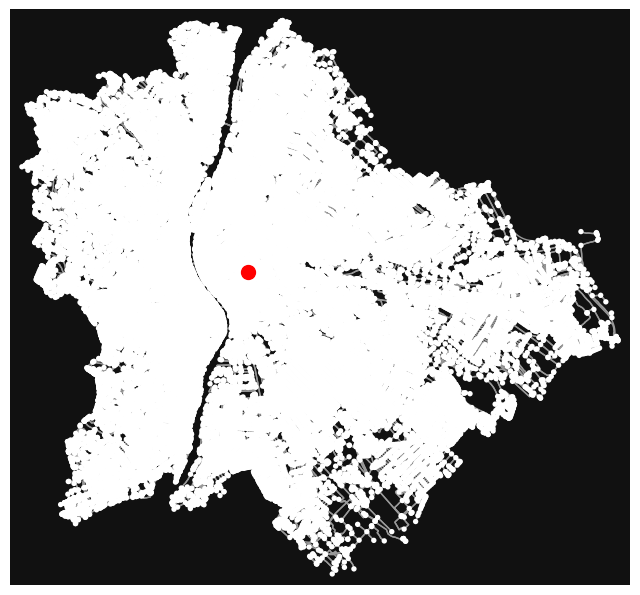

In [150]:
'''
import osmnx as ox
import matplotlib.pyplot as plt

# Define the location and get the graph
place_name = "Budapest, Hungary"
graph = ox.graph_from_place(place_name, network_type='all')

# Get the centroid of the graph
centroid = ox.convert.graph_to_gdfs(graph, nodes=True, edges=False).unary_union.centroid

# Plot the graph
fig, ax = ox.plot_graph(graph, show=False, close=False)

# Draw the point
ax.scatter(centroid.x, centroid.y, c='red', s=100, zorder=5)

# Show the plot
plt.show()
'''

In [ ]:
'''
routes = [route_2010['C'].to_list()]
rc = ['r']
# Define the location and get the graph
place_name = "Hungary"
graph = ox.graph_from_place(place_name, network_type='all')

fig, ax = ox.plot_graph_routes(graph, routes, route_colors=rc, route_linewidth=6, node_size=0)
'''

C:\Users\ELTE\miniconda3\envs\gtfs_env_311\Lib\site-packages\osmnx\_overpass.py:254: UserWarning: This area is 44 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [165]:
import os
from dotenv import load_dotenv

load_dotenv()

apikey = os.getenv('gmap_api_key')


In [195]:
first= route_2010.iloc[0]
start_c_lat=first.C[0]
start_c_lon=first.C[1]

In [202]:
import gmplot
# Your Google Maps API key

# Create the map plotter
gmap = gmplot.GoogleMapPlotter(start_c_lat, start_c_lon, 14, apikey=apikey)

# Add a marker
for i,row in route_2010.iterrows():
    gmap.marker(row['C'][0], row['C'][1],label=row['SZH_NEV'] , color='cornflowerblue')
    
# List of coordinates (latitude, longitude)
coordinates = [(37.766956, -122.438481), (37.768956, -122.428481), (37.769956, -122.418481)]

# Separate the coordinates into latitude and longitude lists
latitudes=route_2010['stop_lat']
longitudes=route_2010['stop_lon']

# Plot the polyline
gmap.plot(latitudes, longitudes, 'cornflowerblue', edge_width=2.5)

# Draw the map to an HTML file
gmap.draw('map.html')


In [224]:
from IPython.display import IFrame

IFrame(src='map.html', width=700, height=600)

# időjárárás

https://odp.met.hu/tree.html

historikus adat:
https://odp.met.hu/climate/station_data_series/daily/from_1901/
## Letöltés opd-ről:

In [225]:
from bs4 import BeautifulSoup as bs
import requests
import zipfile

url_base= "https://odp.met.hu/climate/station_data_series/daily/from_1901/"
urls=["maximum_temperature","mean_temperature","minimum_temperature","precipitation_sum"]


def get_soup(url):
    return bs(requests.get(url).text, 'html.parser')
filetype = ".zip"

datafolder_base = "data/odp/"

import os

def create_folder_if_not_exists(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
        print(f"Directory '{folder_name}' created successfully!")
    else:
        print(f"Directory '{folder_name}' already exists.")

create_folder_if_not_exists(datafolder_base)


def  scrap_and_load_input_data(t):
    url=url_base+t+"/"
    # dfs: list of all the new dataframes that comes from the new scrap
    dfs = []
    # check what files are on the page
    found_links=[]
    data_path=datafolder_base+t+"/"
    create_folder_if_not_exists(data_path)

    for link in get_soup(url).find_all('a'):
        file_link = link.get('href')
        # links on icon too (?)
        if file_link in found_links:
            continue
        found_links.append(file_link)
        # print(link)
        if filetype not in file_link:
            print('Not searched file {}'.format(file_link))
            continue
        # get the upload time of the file
        #d = get_datetime(file_link)
        #print('File found for {}'.format(d))
        # if we already loaded the file into db, or not the expected format then skip
        #if d in dates:
        #    print('Already loaded {}, SKIPPED'.format(d))
        #    continue
        #if not d:
        #    print('Not per date measurement file, SKIPPED')
        #    continue
        print('Downloading {}'.format(file_link))

        # file with data not loaded into weather table yet download
        with open(data_path + file_link, 'wb') as file:
            response = requests.get(url + file_link)
            print('Response Code:', response.status_code)
            file.write(response.content)


for t in urls:
    scrap_and_load_input_data(t)


Directory 'data/odp/' already exists.
Directory 'data/odp/maximum_temperature/' already exists.
Not searched file https://odp.met.hu
Not searched file ?C=N;O=D
Not searched file ?C=M;O=A
Not searched file ?C=S;O=A
Not searched file ?C=D;O=A
Not searched file /climate/station_data_series/daily/from_1901/
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Directory 'data/odp/mean_temperature/' already exists.
Not searched file https://odp.met.hu
Not searched file ?C=N;O=D
Not searched file ?C=M;O=A
Not searched file ?C=S;O=A
Not searched file ?C=D;O=A
Not searched file /climate/station_data_series/daily/from_1901/
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Response Code: 200
Directory 'data/odp/minimum_temperature/' already e

# Kitömörítés, és egy db fájlba pakolás

In [215]:
def extract_and_assemble(t):
    res_l=[]
    data_path=datafolder_base+t+"/"
    for fn in os.listdir(data_path):
        if not fn.endswith(".zip"):
            continue
        create_folder_if_not_exists(data_path+"extracted/")
        extracted_folder = data_path+"extracted/" + fn.split('.')[0] + '/'
        print(f'Extracting {data_path+"extracted/" + fn} ')
        print(fn)
        loc_name=fn.split('_')[2]
        
        # create folder with the same name of zip, and extract content in it
        with zipfile.ZipFile(data_path + fn, 'r') as zip_ref:
            if not os.path.exists(extracted_folder):
                os.mkdir(extracted_folder)
            zip_ref.extractall(extracted_folder)
            # iterate over all the downloaded files (per zip, with hourly update we expect a single file)
            for f in os.listdir(extracted_folder):
                # content of file to df
                df = pd.read_csv(extracted_folder + f, sep=";", skipinitialspace=True,parse_dates=['Time'], date_format='%Y%m%d')
                df['Loc']=loc_name
                df.set_index(['Loc','Time'], inplace=True)
                df.columns = df.columns.str.strip()
                df.drop(columns='EOR', inplace=True)
                #clean_weather_df(df)
                # collect dataframes in order to process for the result fusarium table
                res_l.append(df)
                # load the data from file into weather table
                #append_to_table(data_table_name, df, engine)
                # delete file
                os.remove(extracted_folder + f)
            # delete directory
            os.rmdir(extracted_folder)
    return pd.concat(res_l)
        #os.remove(hourly_data_folder + file_link)
        # push the file update time into  update_time table
        #days_df = pd.DataFrame.from_dict({'Time': [pd.to_datetime(d)]})
        #append_to_table(day_table_name, days_df, engine)
    #ret=pd.DataFrame()
    #if len(dfs)>0:
    #    ret= pd.concat(dfs,axis=0, ignore_index=True)
    #return ret


res = pd.concat([extract_and_assemble(t) for t in urls],axis=1)

        

Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/maximum_temperature/extracted/tx_o_Budapest_19012023.csv.zip 
tx_o_Budapest_19012023.csv.zip
Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/maximum_temperature/extracted/tx_o_Debrecen_19012023.csv.zip 
tx_o_Debrecen_19012023.csv.zip
Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/maximum_temperature/extracted/tx_o_Keszthely_19012023.csv.zip 
tx_o_Keszthely_19012023.csv.zip
Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/maximum_temperature/extracted/tx_o_Miskolc_19012023.csv.zip 
tx_o_Miskolc_19012023.csv.zip
Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/maximum_temperature/extracted/tx_o_Nyiregyhaza_19012023.csv.zip 
tx_o_Nyiregyhaza_19012023.csv.zip
Directory 'data/odp/maximum_temperature/extracted/' already exists.
Extracting data/odp/m

OSError: Cannot save file into a non-existent directory: 'data\opd'

In [216]:
res.tail()

tx    t   tn    r
Loc     Time                           
Turkeve 2023-12-27  11.3  6.1  2.5  0.0
        2023-12-28  10.8  4.8  0.4  0.0
        2023-12-29  10.9  3.7 -0.4  0.0
        2023-12-30  10.7  3.8 -0.1  0.0
        2023-12-31  11.2  5.1  0.2  0.0

In [217]:
res.to_csv("data/odp/weather.csv")